In [1]:
# !pip install transformers

In [2]:
        import os
        os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
        # Your code follows

In [3]:
import pandas as pd
from datasets import Dataset
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [4]:

model_name = "raavip/gpt2-toxic-comment-classifier"

tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=6)
model.config.pad_token_id = tokenizer.pad_token_id

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
tokenizer

GPT2TokenizerFast(name_or_path='raavip/gpt2-toxic-comment-classifier', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}
)

In [6]:

classifier = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    top_k=None
)


Device set to use cuda:0


In [7]:
df_test = pd.read_csv('test.csv')
len(df_test)

153164

In [8]:
df_test.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [9]:
df_test_labels  = pd.read_csv('test_labels.csv')
len(df_test_labels)

153164

In [10]:
df_test_labels.head(5)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [11]:
merged_df = pd.merge(df_test, df_test_labels, on='id')
len(merged_df)

153164

In [12]:
merged_df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


In [13]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
filtered_df = merged_df[~(merged_df[label_cols] == -1).all(axis=1)].copy()
display(filtered_df.head())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
7,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0


In [14]:
len(filtered_df)

63978

In [15]:
max_length = tokenizer.model_max_length
# to prevent "Token indices sequence length is longer than the specified maximum sequenc"
max_length

1024

In [16]:
# is_too_long = filtered_df['comment_text'].apply(lambda text: len(tokenizer.encode(text)) > max_length)


In [17]:
# Filter the DataFrame
# original_count = len(filtered_df)
# filtered_df = filtered_df[~is_too_long]
# new_count = len(filtered_df)


In [18]:

# print(f"Removed {original_count - new_count} sequences that were longer than {max_length} tokens.")
# print(f"New DataFrame size: {new_count}")


In [19]:
toxic_samples_mask = (filtered_df[label_cols] == 1).any(axis=1)

# Filter the DataFrame to include only toxic samples
toxic_filtered_df = filtered_df[toxic_samples_mask].copy()

# Select the first 20 samples from the toxic subset (or fewer if less than 20 toxic samples exist)
twenty_toxic_samples_df = toxic_filtered_df.head(20)

In [20]:
twenty_toxic_samples_df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
21,00091c35fa9d0465,"== Arabs are committing genocide in Iraq, but ...",1,0,0,0,0,0
48,0013fed3aeae76b7,DJ Robinson is gay as hell! he sucks his dick ...,1,0,1,0,1,1
59,0017d4d47894af05,":Fuck off, you anti-semitic cunt. |",1,0,1,0,1,0
76,001d739c97bc2ae4,How dare you vandalize that page about the HMS...,1,0,0,0,0,0
81,001eff4007dbb65b,"::No, he is an arrogant, self serving, immatur...",1,0,1,0,1,0


In [21]:
twenty_toxic_samples_comments = twenty_toxic_samples_df['comment_text'].tolist()

# Use the classifier directly on the list of comments
predictions_twenty_toxic_samples = classifier(twenty_toxic_samples_comments)
predicted_labels_twenty_toxic_samples_list = []
threshold = 0.5

In [22]:
predicted_labels_twenty_toxic_samples_list = [] # Initialize the list outside the loop

for comment_predictions in predictions_twenty_toxic_samples:
    # Sort predictions by score in descending order
    sorted_predictions = sorted(comment_predictions, key=lambda x: x['score'], reverse=True)

    predicted_labels = []
    # Take the top 3 predictions
    for i, pred in enumerate(sorted_predictions[:3]):
        # Map 'LABEL_X' to the corresponding label name
        label_index = int(pred['label'].split('_')[1])
        label_name = label_cols[label_index]
        predicted_labels.append(f"{label_name} ({pred['score']:.2f})") # Include score for clarity


    if not predicted_labels:
        predicted_labels = ["None"]
    predicted_labels_twenty_toxic_samples_list.append(predicted_labels) # Append the list of predicted labels for the current comment

# Add the predicted labels as a new column to the twenty_toxic_samples_df
twenty_toxic_samples_df['predicted_labels'] = predicted_labels_twenty_toxic_samples_list

# Display the comments, true labels, and predicted labels for the toxic samples
display(twenty_toxic_samples_df[['comment_text'] + label_cols + ['predicted_labels']].head(20))

/tmp/ipython-input-3108960703.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twenty_toxic_samples_df['predicted_labels'] = predicted_labels_twenty_toxic_samples_list


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,predicted_labels
21,"== Arabs are committing genocide in Iraq, but ...",1,0,0,0,0,0,"[toxic (0.97), identity_hate (0.03), insult (0..."
48,DJ Robinson is gay as hell! he sucks his dick ...,1,0,1,0,1,1,"[toxic (0.64), obscene (0.18), identity_hate (..."
59,":Fuck off, you anti-semitic cunt. |",1,0,1,0,1,0,"[toxic (0.39), obscene (0.26), identity_hate (..."
76,How dare you vandalize that page about the HMS...,1,0,0,0,0,0,"[toxic (1.00), insult (0.00), identity_hate (0..."
81,"::No, he is an arrogant, self serving, immatur...",1,0,1,0,1,0,"[insult (0.50), toxic (0.49), obscene (0.01)]"
219,":Eek, but shes cute in an earthy kind of way. ...",1,0,0,0,0,0,"[toxic (0.79), obscene (0.21), insult (0.00)]"
258,"::::Well, it sucks to have a university to be ...",1,0,1,0,0,0,"[toxic (0.96), obscene (0.04), insult (0.00)]"
259,== Argh == \n\n Some random idiot deleted the ...,1,0,1,0,1,0,"[toxic (0.82), insult (0.18), obscene (0.00)]"
302,(we hate america and we are going to bomb the ...,1,0,1,1,0,0,"[threat (0.88), identity_hate (0.11), toxic (0..."
305,== Bold textYOU SUCK!!! == \n\n \n\n U SUCK H...,1,0,1,0,1,0,"[toxic (0.64), obscene (0.30), insult (0.06)]"


In [25]:
from tqdm.auto import tqdm
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

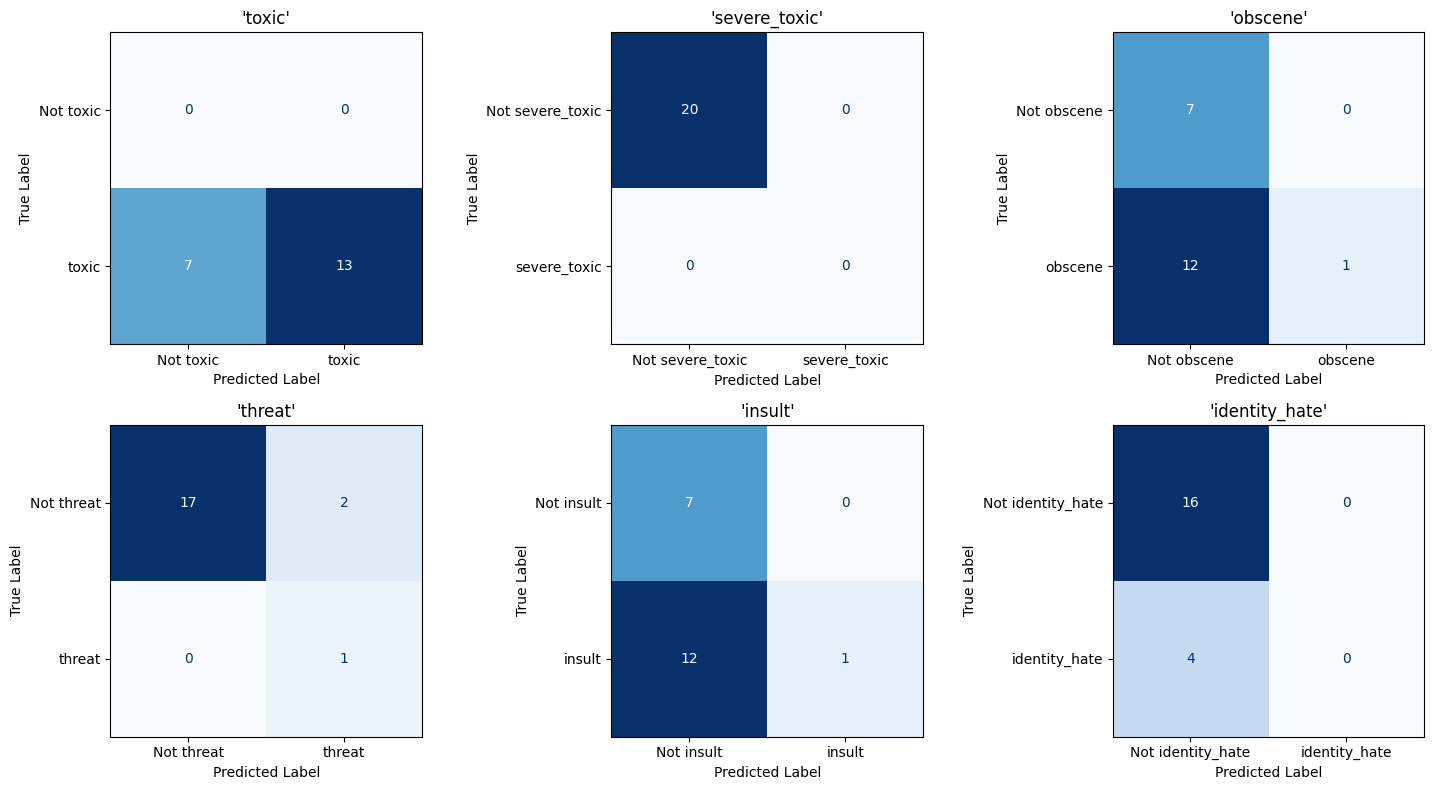

In [26]:
# 1. Get the true labels from your DataFrame
true_labels = twenty_toxic_samples_df[label_cols].values

# 2. Convert your model's prediction scores into binary (0 or 1) labels
threshold = 0.5
predicted_labels = []

for pred_list in predictions_twenty_toxic_samples:
    scores = {p['label']: p['score'] for p in pred_list}
    binary_preds = []
    for i in range(len(label_cols)):
        score = scores.get(f'LABEL_{i}', 0)
        binary_preds.append(1 if score > threshold else 0)
    predicted_labels.append(binary_preds)

predicted_labels = np.array(predicted_labels)

# 3. Calculate and plot the confusion matrices
mcm = multilabel_confusion_matrix(true_labels, predicted_labels)

# Plotting the matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
for i, label in enumerate(label_cols):
    disp = ConfusionMatrixDisplay(confusion_matrix=mcm[i], display_labels=[f"Not {label}", label])
    ax = axes[i]
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"'{label}'")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()

toxic': It correctly identified 13 out of 20 toxic comments.

'obscene': It correctly identified 12 out of 13 obscene comments.

'insult': It correctly identified 12 out of 13 insulting comments.

For these classes, the number of True Positives (bottom-right box) is high, which is a great sign.

In [27]:
mcm

array([[[ 0,  0],
        [ 7, 13]],

       [[20,  0],
        [ 0,  0]],

       [[ 7,  0],
        [12,  1]],

       [[17,  2],
        [ 0,  1]],

       [[ 7,  0],
        [12,  1]],

       [[16,  0],
        [ 4,  0]]])